<a href="https://colab.research.google.com/github/ahmadSoliman94/Machine-Learning/blob/main/ML/Projects/Electro-Pi-projects/Classification/Kopie_von_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('drive/MyDrive/Fusion')


In [ ]:
!ls

 50_Startups.csv	   diabetes_null.csv   Social_Network_Ads.csv
 boston.csv		   Insurance.xlsx      unprocessed_data.csv
'Concrete_Data (4).xlsx'   Salary_Data.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv('Social_Network_Ads.csv')

In [ ]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

#### Distribution of age over purchased and not purchased users

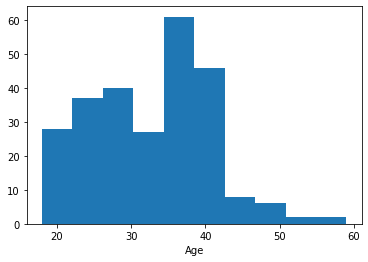

In [ ]:
# Histogram
plt.hist(df['Age'].where(df['Purchased'] == 0))
plt.xlabel('Age')
plt.show()

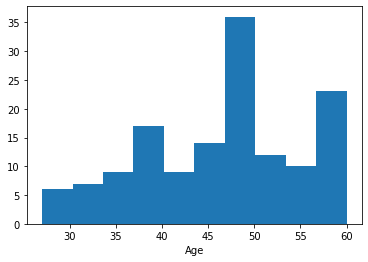

In [ ]:
plt.hist(df['Age'].where(df['Purchased'] == 1))
plt.xlabel('Age')
plt.show()

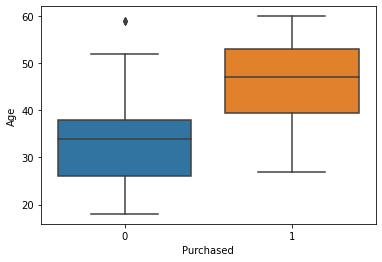

In [ ]:
# boxplot 
plot = sns.boxplot(x='Purchased',y='Age', data=df)
plt.show()

#### distribution of Estimated salary over purchased and not purchased users.

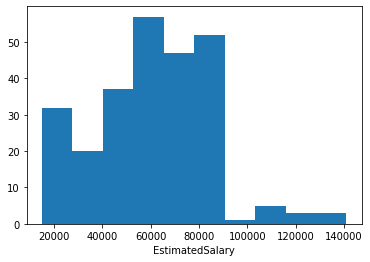

In [ ]:
plt.hist(df['EstimatedSalary'].where(df['Purchased'] == 0),bins=10)
plt.xlabel('EstimatedSalary')
plt.show()

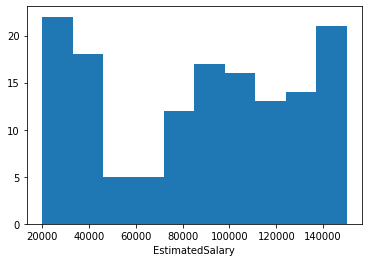

In [ ]:
plt.hist(df['EstimatedSalary'].where(df['Purchased'] == 1))
plt.xlabel('EstimatedSalary')
plt.show()

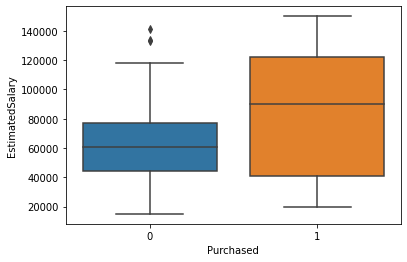

In [ ]:
plot = sns.boxplot(x='Purchased',y='EstimatedSalary', data=df)
plt.show()

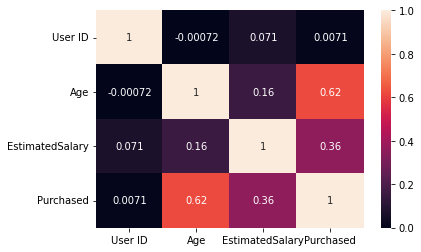

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
df = df.drop('User ID',axis=1)

In [ ]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


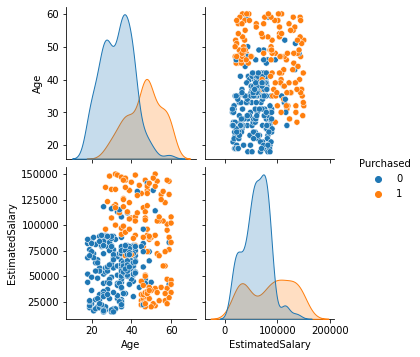

In [ ]:
sns.pairplot(df,hue='Purchased')

In [ ]:
df['Age'].value_counts()

35    32
37    20
26    16
41    16
42    16
39    15
40    15
48    14
47    14
27    13
38    13
28    12
36    12
46    12
31    11
30    11
49    10
29    10
33     9
32     9
24     9
59     7
19     7
45     7
20     7
60     7
34     6
23     6
52     6
25     6
58     6
53     5
57     5
22     5
18     5
21     4
50     4
54     4
55     3
56     3
51     3
43     3
44     2
Name: Age, dtype: int64

In [ ]:
age_37 = df[df['Age']==37]

In [ ]:
age_37

,Gender,Age,EstimatedSalary,Purchased
111,Female,37,71000,0
113,Male,37,55000,0
121,Male,37,72000,0
162,Female,37,33000,0
222,Male,37,144000,1
225,Male,37,53000,0
237,Female,37,80000,0
251,Male,37,52000,0
253,Female,37,146000,1
267,Male,37,74000,0


In [ ]:
age_37['Purchased'].value_counts()

0    13
1     7
Name: Purchased, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

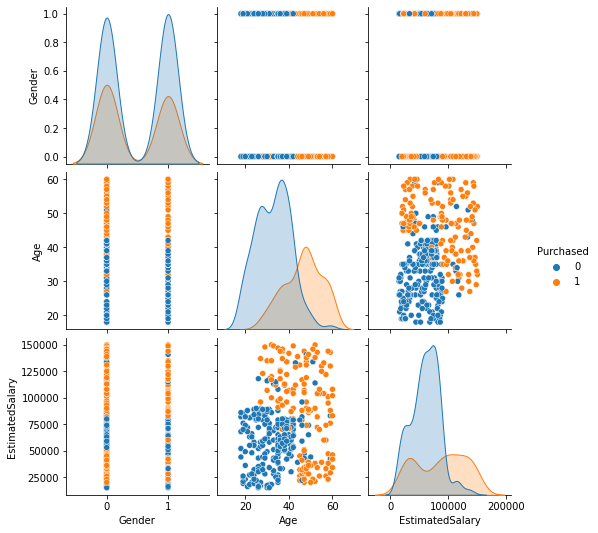

In [ ]:
sns.pairplot(df, vars=df.columns[:-1], hue="Purchased")

# Data Preprocessing

### Splitting Data

In [ ]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [ ]:

X=df[['Gender','Age','EstimatedSalary']].values
y=df['Purchased'].values
print(f' X_shape: {X.shape} \n y_shape: {y.shape}')

 X_shape: (400, 3) 
 y_shape: (400,)


In [ ]:
X_train,X_test,y_train,y_test =train_test_split(X,y , test_size=0.20, random_state=42,shuffle=True)

In [ ]:
print(f' X_train: {X_train.shape} & X_test: {X_test.shape}')
print(f' y_train: {y_train.shape} & y_test: {y_test.shape}')

 X_train: (320, 3) & X_test: (80, 3)
 y_train: (320,) & y_test: (80,)


# Training and Evaluating the Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm 

In [ ]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_test = lg.predict(X_test)
y_pred_train = lg.predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_curve, roc_auc_score, f1_score

print("Test Dataset: \n confusion matrix:" , confusion_matrix(y_test, y_pred_test))
print('accuracy score: ', accuracy_score(y_test, y_pred_test))
print('***********************************')
print("Train Dataset: \n confusion matrix:" , confusion_matrix(y_train, y_pred_train))
print('accuracy score: ', accuracy_score(y_train, y_pred_train))

Test Dataset: 
 confusion matrix: [[52  0]
 [28  0]]
accuracy score:  0.65
***********************************
Train Dataset: 
 confusion matrix: [[205   0]
 [115   0]]
accuracy score:  0.640625


### Polynomial Features

In [ ]:
for i in range(1,10):
  poly_reg = PolynomialFeatures(degree = i)
  X_train_poly_f = poly_reg.fit_transform(X_train)
  X_test_poly_f = poly_reg.transform(X_test)
  lg.fit(X_train_poly_f, y_train)
  y_pred_tra = lg.predict(X_train_poly_f)
  y_pred_tes = lg.predict(X_test_poly_f)
  print('degree: {}'.format(i))
  # print("Test Dataset: \n confusion matrix:" , confusion_matrix(y_test, y_pred_tes))
  print('Test Dataset: \n accuracy score: ', accuracy_score(y_test, y_pred_tes))
  # print("Train Dataset: \n confusion matrix:" , confusion_matrix(y_train, y_pred_tra))
  print('Train Dataset: \n accuracy score: ', accuracy_score(y_train, y_pred_tra))
  print('***********************************')
    

degree: 1
Test Dataset: 
 accuracy score:  0.65
Train Dataset: 
 accuracy score:  0.640625
***********************************
degree: 2
Test Dataset: 
 accuracy score:  0.525
Train Dataset: 
 accuracy score:  0.640625
***********************************
degree: 3
Test Dataset: 
 accuracy score:  0.35
Train Dataset: 
 accuracy score:  0.359375
***********************************
degree: 4
Test Dataset: 
 accuracy score:  0.65
Train Dataset: 
 accuracy score:  0.640625
***********************************
degree: 5
Test Dataset: 
 accuracy score:  0.65
Train Dataset: 
 accuracy score:  0.640625
***********************************
degree: 6
Test Dataset: 
 accuracy score:  0.65
Train Dataset: 
 accuracy score:  0.640625
***********************************
degree: 7
Test Dataset: 
 accuracy score:  0.65
Train Dataset: 
 accuracy score:  0.640625
***********************************


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGIS

degree: 8
Test Dataset: 
 accuracy score:  0.65
Train Dataset: 
 accuracy score:  0.640625
***********************************
degree: 9
Test Dataset: 
 accuracy score:  0.65
Train Dataset: 
 accuracy score:  0.640625
***********************************


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### Adding Polynomial Features and select best degree 


In [ ]:
poly_reg = PolynomialFeatures(degree = 2)
X_train_poly_b = poly_reg.fit_transform(X_train)
X_test_poly_b = poly_reg.transform(X_test)
lg.fit(X_train_poly_b, y_train)
y_pred_tra_b = lg.predict(X_train_poly_b)
y_pred_tes_b = lg.predict(X_test_poly_b)
print("Test Dataset: \n confusion matrix:" , confusion_matrix(y_test, y_pred_tes_b))
print('accuracy score: ', accuracy_score(y_test, y_pred_tes_b))
print('***********************************************')
print("Train Dataset: \n confusion matrix:" , confusion_matrix(y_train, y_pred_tra_b))
print('accuracy score: ', accuracy_score(y_train, y_pred_tra_b))

Test Dataset: 
 confusion matrix: [[35 17]
 [21  7]]
accuracy score:  0.525
***********************************************
Train Dataset: 
 confusion matrix: [[155  50]
 [ 65  50]]
accuracy score:  0.640625


### Normalization

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_poly_b)
X_test_scaled = scaler.transform(X_test_poly_b)

print(np.min(X_train_scaled))
print(np.max(X_train_scaled))

0.0
1.0


In [ ]:
lg.fit(X_train_scaled, y_train)

LogisticRegression()


### Evaluating the model


In [ ]:
y_pred_test_sc = lg.predict(X_test_scaled)
y_pred_train_sc= lg.predict(X_train_scaled)

In [ ]:
print("Test Dataset: \n confusion matrix:" , confusion_matrix(y_test, y_pred_test_sc))
print('accuracy score: ', accuracy_score(y_test, y_pred_test_sc))
print("Train Dataset: \n confusion matrix:" , confusion_matrix(y_train, y_pred_train_sc))
print('accuracy score: ', accuracy_score(y_train, y_pred_train_sc))
print('***********************************************')

Test Dataset: 
 confusion matrix: [[51  1]
 [ 9 19]]
accuracy score:  0.875
Train Dataset: 
 confusion matrix: [[190  15]
 [ 41  74]]
accuracy score:  0.825
***********************************************


### Visualizing Confusion Matrix using Heatmap

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

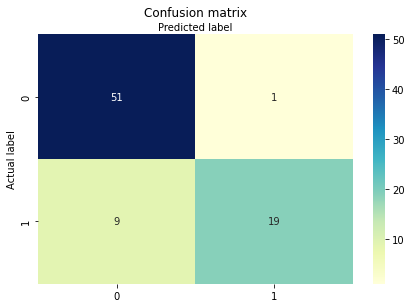

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred_test_sc)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",confusion_matrix(y_test, y_pred_test_sc))
print("Precision:",precision_score(y_test, y_pred_test_sc))
print("Recall:",recall_score(y_test, y_pred_test_sc))
print("F1 Score",f1_score(y_test, y_pred_test_sc))

Accuracy: [[51  1]
 [ 9 19]]
Precision: 0.95
Recall: 0.6785714285714286
F1 Score 0.7916666666666667


### ROC Curve: plot of the true positive rate against the false positive rate

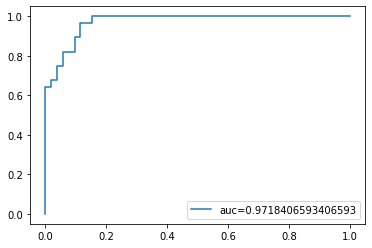

In [ ]:
y_pred_proba = lg.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Classification Report

In [ ]:
from sklearn.metrics import classification_report
print('Classification Report: \n \n' , classification_report(y_test, y_pred_test_sc))


Classification Report: 
 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91        52
           1       0.95      0.68      0.79        28

    accuracy                           0.88        80
   macro avg       0.90      0.83      0.85        80
weighted avg       0.89      0.88      0.87        80



## Regularization 

In [ ]:
lg_r = LogisticRegression(penalty='l2',C=1.0)
lg_r.fit(X_train_scaled , y_train)
y_pred_tra_ = lg_r.predict(X_train_scaled)
y_pred_tes_ = lg_r.predict(X_test_scaled)
print("Test Dataset: \n confusion matrix:" , confusion_matrix(y_test, y_pred_tes_))
print('accuracy score: ', accuracy_score(y_test, y_pred_tes_))
print('***********************************************')
print("Train Dataset: \n confusion matrix:" , confusion_matrix(y_train, y_pred_tra_))
print('accuracy score: ', accuracy_score(y_train, y_pred_tra_))

Test Dataset: 
 confusion matrix: [[51  1]
 [ 9 19]]
accuracy score:  0.875
***********************************************
Train Dataset: 
 confusion matrix: [[190  15]
 [ 41  74]]
accuracy score:  0.825
